#  Unsupervised Learning 

# 1) CUSTID: Identification of Credit Card holder (Categorical)
# 2) BALANCE: Balance amount left in their account to make purchases
# 3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# 4) PURCHASES: Amount of purchases made from account
# 5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
# 6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
# 7) CASHADVANCE: Cash in advance given by the user
# 8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# 9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# 10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# 11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
# 12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
# 13) PURCHASESTRX: Number of purchase transactions made
# 14) CREDITLIMIT: Limit of Credit Card for user
# 15) PAYMENTS: Amount of Payment done by user
# 16) MINIMUM_PAYMENTS: Minimum amount of payments made by user
# 17) PRCFULLPAYMENT: Percent of full payment paid by user
# 18) TENURE: Tenure of credit card service for use

# Q1. What does the primary analysis of several categorical features reveal?

In [2]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 18) 
pd.set_option('display.max_rows', 8950) 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("credit_card.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df.shape

(8950, 18)

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [12]:
categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in train dataset
categorical_features.columns

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15136/1888521553.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in train dataset


Index(['CUST_ID'], dtype='object')

# Q2. Perform the following Exploratory Data Analysis tasks:
# a. Missing Value Analysis

In [13]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
mean_value=df['MINIMUM_PAYMENTS'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['MINIMUM_PAYMENTS'].fillna(value=mean_value, inplace=True)

In [15]:
mean_value=df['CREDIT_LIMIT'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['CREDIT_LIMIT'].fillna(value=mean_value, inplace=True)


In [16]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
df. drop("CUST_ID", axis=1, inplace=True) 

# b. Outlier Treatment using the Z-score method

In [18]:
outlier=df.select_dtypes(['number'])

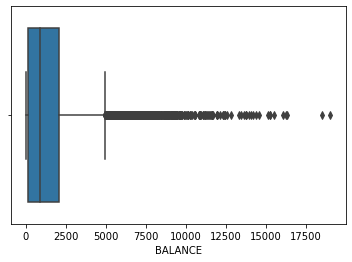

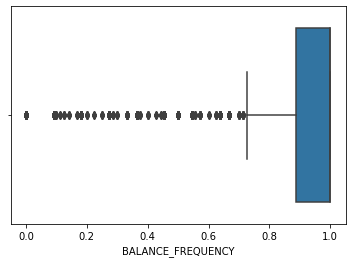

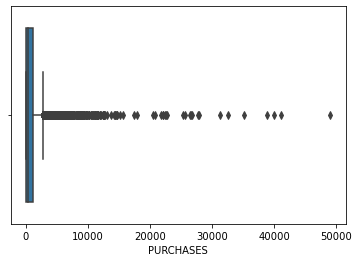

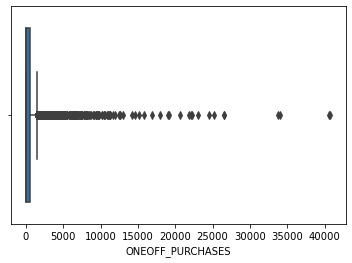

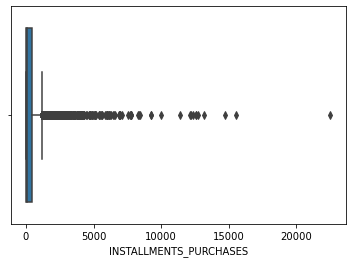

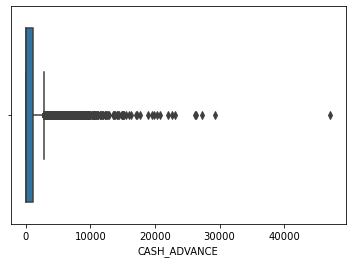

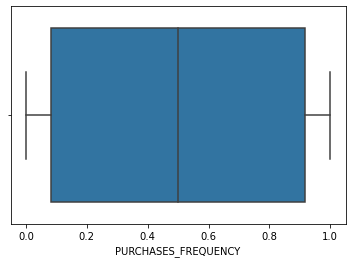

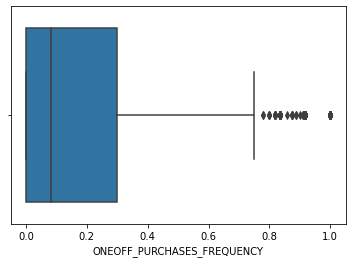

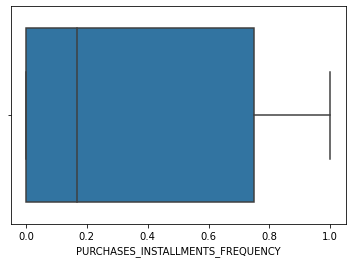

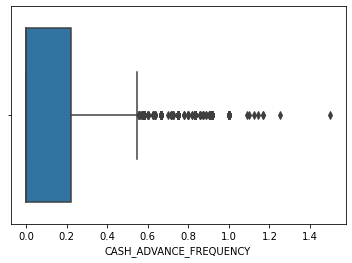

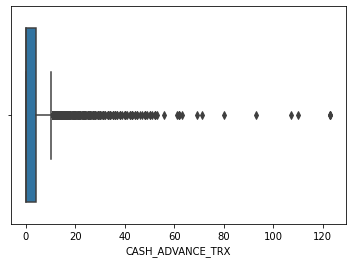

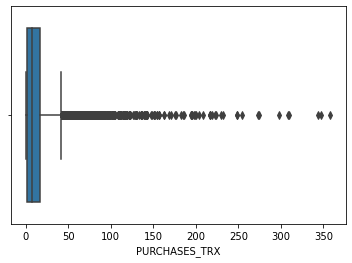

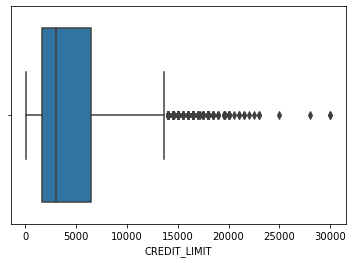

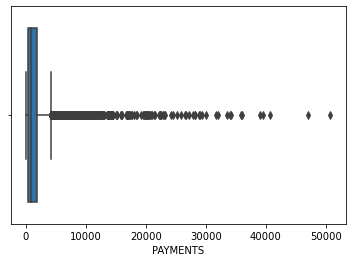

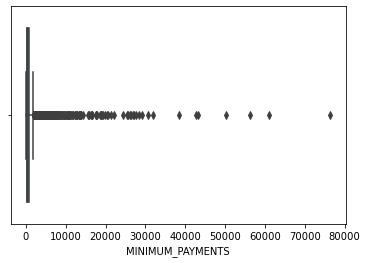

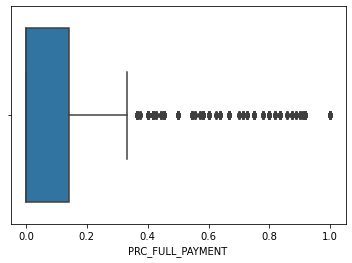

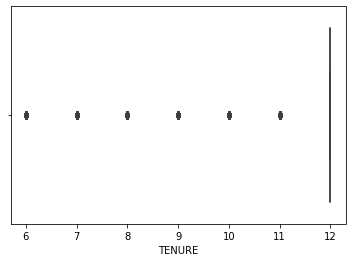

In [19]:
for column in outlier:
    plt.figure()
    sns.boxplot(x=column,data=outlier)

In [20]:
df = df.astype({ 'BALANCE':"int", 'BALANCE_FREQUENCY':"int", 'PURCHASES':"int",
       'ONEOFF_PURCHASES':"int", 'INSTALLMENTS_PURCHASES':"int", 'CASH_ADVANCE':"int",
       'PURCHASES_FREQUENCY':"int", 'ONEOFF_PURCHASES_FREQUENCY':"int",
       'PURCHASES_INSTALLMENTS_FREQUENCY':"int", 'CASH_ADVANCE_FREQUENCY':"int",'CREDIT_LIMIT':"int", 'PAYMENTS':"int",
       'MINIMUM_PAYMENTS':"int", 'PRC_FULL_PAYMENT':"int"}) 

In [21]:
df.columns
col=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [22]:
def zscore_outliers(data_1):
    outliers=[]    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [23]:
for i in col:
    print('No. of outliers ', i, '=', zscore_outliers(df[i]))

No. of outliers  BALANCE = [12136, 8181, 9381, 8504, 14224, 11167, 9354, 19043, 10598, 13673, 11972, 8350, 9047, 9612, 7938, 8097, 9261, 9206, 8939, 8806, 11278, 12474, 7957, 11209, 9335, 8647, 9601, 10249, 12478, 13479, 15258, 11547, 8997, 9149, 9559, 7975, 15244, 8781, 8900, 14411, 10359, 13763, 7811, 13774, 10397, 9470, 8646, 9164, 8220, 11083, 10131, 9901, 11654, 14581, 9255, 12358, 12373, 8823, 8115, 8884, 9387, 7994, 7886, 9680, 8787, 8625, 8151, 11431, 8281, 8767, 8809, 8159, 8953, 7919, 11670, 10822, 9502, 11734, 7888, 9303, 8099, 11955, 9264, 9459, 8435, 9355, 8084, 7842, 8636, 10599, 10905, 9226, 7820, 8356, 15532, 7985, 11964, 12856, 8771, 10915, 11416, 11077, 8559, 9226, 8073, 8198, 11930, 11642, 8214, 9266, 12323, 8030, 8791, 7857, 9753, 9629, 8897, 11631, 9342, 10871, 8571, 8341, 8161, 9111, 10092, 9993, 10124, 8700, 9630, 9598, 7899, 14100, 8539, 9061, 8983, 8260, 8121, 8695, 13968, 10116, 9440, 18495, 8043, 8477, 8040, 12596, 9061, 10571, 9699, 11206, 9919, 9962, 8315, 

In [24]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  BALANCE
capping the  BALANCE_FREQUENCY
capping the  PURCHASES
capping the  ONEOFF_PURCHASES
capping the  INSTALLMENTS_PURCHASES
capping the  CASH_ADVANCE
capping the  PURCHASES_FREQUENCY
capping the  ONEOFF_PURCHASES_FREQUENCY
capping the  PURCHASES_INSTALLMENTS_FREQUENCY
capping the  CASH_ADVANCE_FREQUENCY
capping the  CASH_ADVANCE_TRX
capping the  PURCHASES_TRX
capping the  CREDIT_LIMIT
capping the  PAYMENTS
capping the  MINIMUM_PAYMENTS
capping the  PRC_FULL_PAYMENT
capping the  TENURE


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15136/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15136/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15136/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

# c. Deal with correlated variables


<AxesSubplot:>

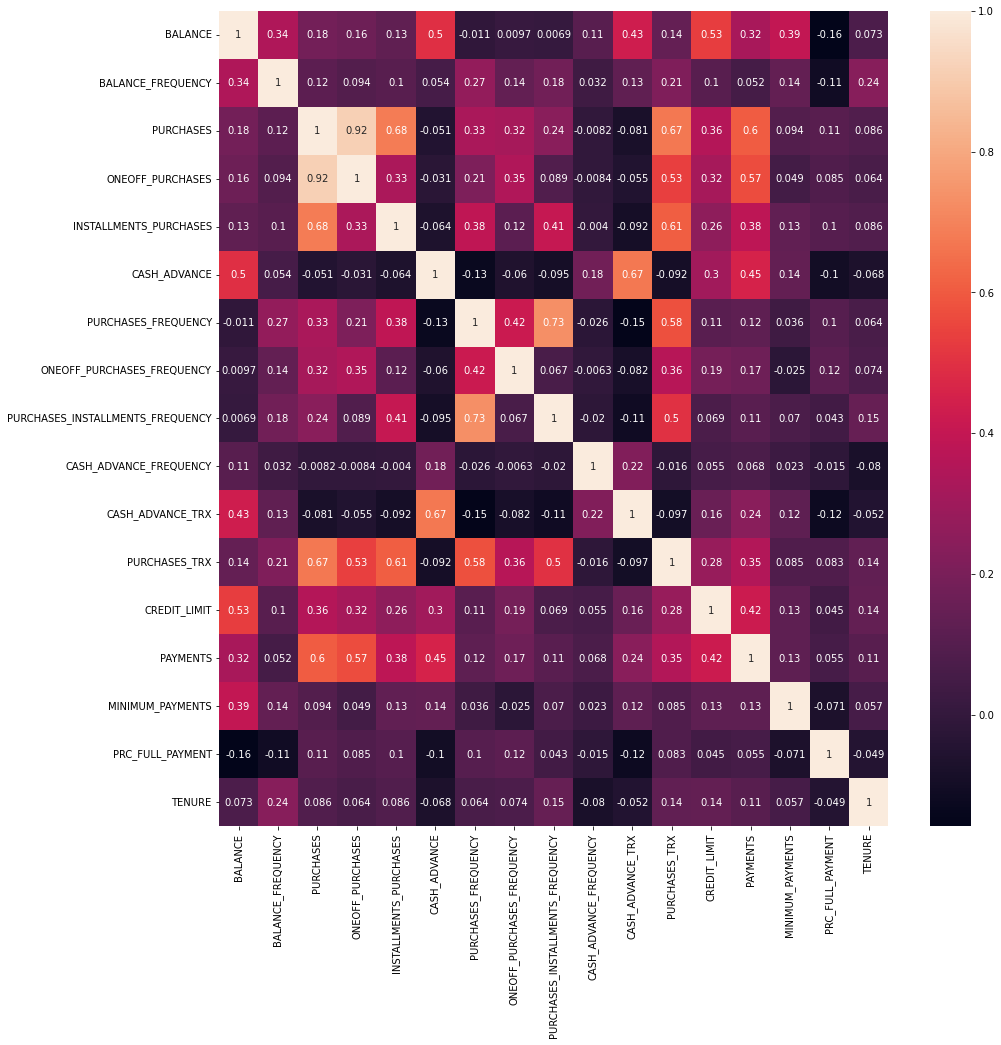

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [26]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [27]:
high_corr_var

[('PURCHASES', 'ONEOFF_PURCHASES')]

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit(df)

PCA(n_components=17)

In [31]:
print(pca.explained_variance_)

[2.08755895e+07 7.80850133e+06 6.13903124e+06 4.99002634e+06
 2.11649357e+06 1.19755505e+06 7.93380260e+05 2.18201562e+02
 3.16427383e+01 1.58461638e+01 1.69142655e+00 2.01554234e-01
 1.32476341e-01 5.64977836e-02 4.58798003e-02 2.08993619e-02
 3.46852128e-03]


In [32]:
print(pca.components_)

[[ 2.91524470e-01  1.59583366e-05  2.92688011e-01  2.10831385e-01
   8.18382668e-02  2.16282458e-01  1.43857047e-05  1.08555585e-05
   8.89476724e-06  1.10105933e-06  3.33562556e-04  1.92756743e-03
   6.90118646e-01  4.87428195e-01  1.32544013e-01  1.42430823e-06
   3.92669178e-05]
 [-3.00648536e-01 -1.17481114e-05  5.00806470e-01  3.80351027e-01
   1.20479761e-01 -2.04277390e-01  3.07225359e-05  1.53405881e-05
   1.81517727e-05 -1.27751588e-06 -4.75925109e-04  2.84495560e-03
  -4.47418454e-01  4.70368787e-01 -1.90927780e-01  1.03876748e-05
   3.20078283e-06]
 [ 2.75131236e-01  1.91519295e-05 -9.68435021e-02 -7.75615027e-02
  -1.92971844e-02  4.03015500e-01 -1.83637836e-05 -1.44485690e-05
  -4.34928942e-06  2.04272563e-06  8.46519686e-04 -1.03861070e-03
  -5.06737777e-01  2.96772207e-01  6.33447522e-01 -1.30521626e-05
  -2.71086909e-05]
 [ 5.49073644e-02  2.51355202e-05  2.95896161e-01  1.87202351e-01
   1.08694317e-01 -5.60272374e-01  3.63465229e-05  1.07876251e-05
   2.45730197e-05 -

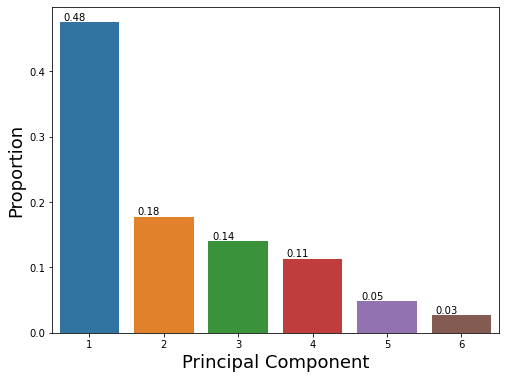

In [33]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


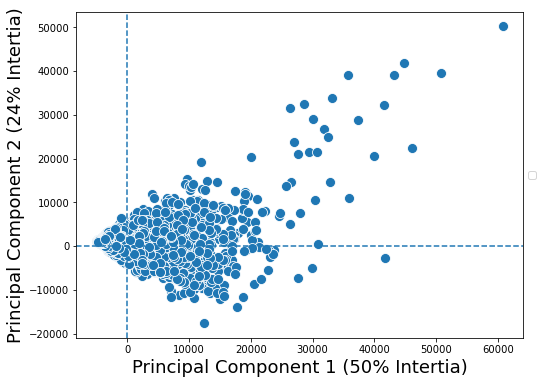

In [34]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6)) 
sns.scatterplot(x_pca[:,0],x_pca[:,1], 
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--') 
plt.axhline(0, ls='--') 
plt.show()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15136/1238262932.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


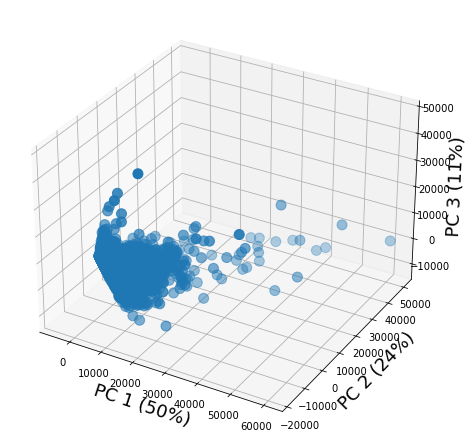

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6)) 
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], s=100, cmap="Set1")
ax.set_xlabel('PC 1 (50%)',fontsize=18)
ax.set_ylabel('PC 2 (24%)',fontsize=18)
ax.set_zlabel('PC 3 (11%)',fontsize=18) 
plt.show()

### Dimensionality Reduction

In [38]:
pca3 = PCA(n_components=10)
pca3.fit(df)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(df)

[[ 2.91524470e-01  1.59583366e-05  2.92688011e-01  2.10831385e-01
   8.18382668e-02  2.16282458e-01  1.43857047e-05  1.08555585e-05
   8.89476724e-06  1.10105933e-06  3.33562556e-04  1.92756743e-03
   6.90118646e-01  4.87428195e-01  1.32544013e-01  1.42430823e-06
   3.92669178e-05]
 [-3.00648536e-01 -1.17481114e-05  5.00806470e-01  3.80351027e-01
   1.20479761e-01 -2.04277390e-01  3.07225359e-05  1.53405881e-05
   1.81517727e-05 -1.27751588e-06 -4.75925109e-04  2.84495560e-03
  -4.47418454e-01  4.70368787e-01 -1.90927780e-01  1.03876748e-05
   3.20078283e-06]
 [ 2.75131236e-01  1.91519295e-05 -9.68435021e-02 -7.75615027e-02
  -1.92971844e-02  4.03015500e-01 -1.83637836e-05 -1.44485690e-05
  -4.34928942e-06  2.04272563e-06  8.46519686e-04 -1.03861070e-03
  -5.06737777e-01  2.96772207e-01  6.33447522e-01 -1.30521626e-05
  -2.71086909e-05]
 [ 5.49073644e-02  2.51355202e-05  2.95896161e-01  1.87202351e-01
   1.08694317e-01 -5.60272374e-01  3.63465229e-05  1.07876251e-05
   2.45730197e-05 -

# Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [40]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [41]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

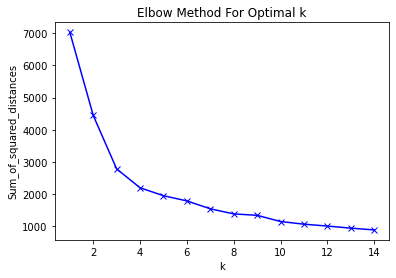

In [42]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df)
          score=silhouette_score(df,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=2,silhouette_score  is 0.5116493657110511)
(for n_clusters=5,silhouette_score  is 0.3998766845368404)
(for n_clusters=6,silhouette_score  is 0.4087778388640122)
(for n_clusters=7,silhouette_score  is 0.3697286514705669)
(for n_clusters=8,silhouette_score  is 0.38170657875883)


In [44]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4)

# fit the model
model.fit(df)

KMeans(n_clusters=4)

In [46]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40,0,95,0,95,0,0,0,0,0,0,2.0,1000,201,139,0,12,0
1,3202,0,0,0,0,6442,0,0,0,0,4,0.0,7000,4103,1072,0,12,3
2,2495,1,773,773,0,0,1,1,0,0,0,12.0,7500,622,627,0,12,2
3,1666,0,1499,1499,0,205,0,0,0,0,1,1.0,7500,0,864,0,12,2
4,817,1,16,16,0,0,0,0,0,0,0,1.0,1200,678,244,0,12,0


In [47]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True) 

(array([0, 1, 2, 3]), array([5723,  120, 2340,  767], dtype=int64))

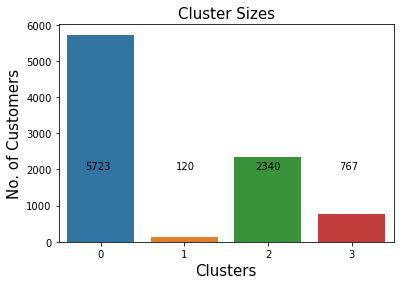

In [48]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()